In [2]:
import os, shutil

In [2]:
original_dataset_dir = r'C:\Users\ozgurberat\Desktop\train'
base_dir = r'C:\Users\ozgurberat\Desktop\smaller_dataset'

os.mkdir(base_dir)

In [11]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

FileExistsError: [WinError 183] Halen varolan bir dosya oluşturulamaz: 'C:\\Users\\ozgurberat\\Desktop\\smaller_dataset\\train'

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)        
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)            

In [11]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


In [13]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [4]:
help(layers.Conv2D)

Help on class Conv2D in module tensorflow.python.keras.layers.convolutional:

class Conv2D(Conv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`. You can use `None` when
 |  a dimension has variable size.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
 |  >>> # size is 4.
 |  >>> input_shape = (4, 28, 28, 3)
 |  >>> x = tf.random

#### Data Preprocessing

As you know by now, data should be formatted into appropriately preprocessed floating point tensors before being fed into the network. Currently, the data sits on a drive as JPEG files, so the steps for getting it into the network are roughly as follows: 

1. Read the picture files
2. Decode the JPEG content to RGB grids of pixels.
3. Convert these into floating-point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know, neural networks prefer to deal with small input values).

In [15]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale all images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

base_dir = r'C:\Users\ozgurberat\Desktop\smaller_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# flow_from_directory
# train_dir is a directory that has n folders in it where n is the number of classes.
# set class_mode = 'binary' or 'categorical' depends on the case.
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
print(f'Samples in train_generator: {train_generator.samples}')
print(f'Samples in validation_generator: {validation_generator.samples}')

Samples in train_generator: 2000
Samples in validation_generator: 1000


In [17]:
for data_batch, labels_batch in train_generator:
    print(f'data batch shape: {data_batch.shape}')
    print(f'labels batch shape: {labels_batch.shape}')   
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [18]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

C:\Users\ozgurberat\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 50s 489ms/step - loss: 0.6885 - acc: 0.5415 - val_loss: 0.6630 - val_acc: 0.5860
Epoch 2/30
100/100 [==============================] - 55s 549ms/step - loss: 0.6487 - acc: 0.6165 - val_loss: 0.6383 - val_acc: 0.6070
Epoch 3/30
100/100 [==============================] - 64s 639ms/step - loss: 0.6033 - acc: 0.6670 - val_loss: 0.6090 - val_acc: 0.6610
Epoch 4/30
100/100 [==============================] - 67s 667ms/step - loss: 0.5697 - acc: 0.6905 - val_loss: 0.6064 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 66s 660ms/step - loss: 0.5398 - acc: 0.7230 - val_loss: 0.5753 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 59s 588ms/step - loss: 0.5183 - acc: 0.7480 - val_loss: 0.5766 - val_acc: 0.6840
Epoch 7/30
100/100 [==============================] - 63s 627ms/step - loss: 0.4888 - acc: 0.7610 - val_loss: 0.6251 - val_acc: 0.6760
Epoch 8/30
100/100 [==============================] - 5

In [19]:
model.save('dogs_and_cats_small_1')

INFO:tensorflow:Assets written to: dogs_and_cats_small_1\assets


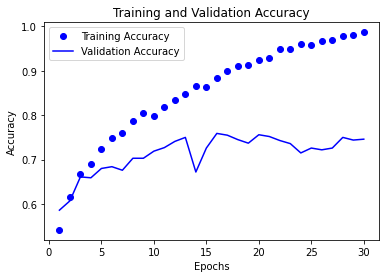

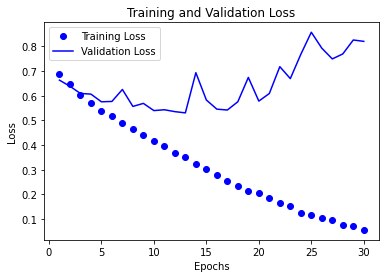

In [20]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

#### Data Augmentation 

In [22]:
datagen = ImageDataGenerator(rotation_range=40, #Between 0 and 180
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True,
                            fill_mode='nearest')

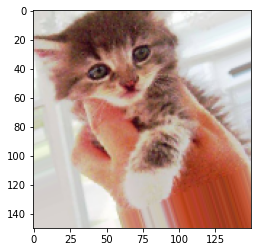

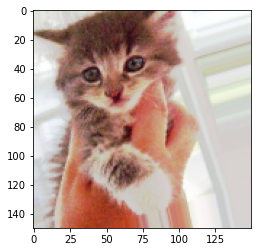

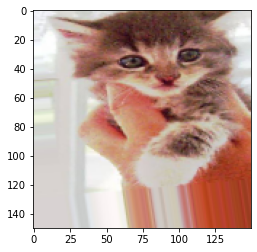

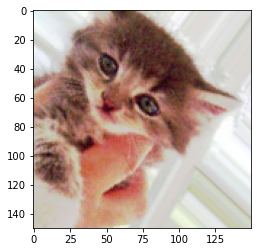

In [23]:
from keras.preprocessing import image

train_cats_dir = os.path.join(train_dir, 'cats')

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img) # Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1, ) + x.shape) # Reshapes it to (1, 150, 150, 3)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
        
plt.show()        

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['acc'])

In [37]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) # Validation data shouldn't be augmented.

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150, 150), 
                                                    batch_size=32, 
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                         target_size=(150, 150),
                                                         batch_size=32, 
                                                         class_mode='binary')

history = model.fit(train_generator, 
                    epochs=30,
                    validation_data=validation_generator)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 [==============================] - 72s 1s/step - loss: 0.6807 - acc: 0.5635 - val_loss: 0.6824 - val_acc: 0.5640
Epoch 2/30
63/63 [==============================] - 77s 1s/step - loss: 0.6701 - acc: 0.5820 - val_loss: 0.6960 - val_acc: 0.5520
Epoch 3/30
63/63 [==============================] - 82s 1s/step - loss: 0.6642 - acc: 0.5895 - val_loss: 0.6694 - val_acc: 0.5800
Epoch 4/30
63/63 [==============================] - 86s 1s/step - loss: 0.6537 - acc: 0.6095 - val_loss: 0.6538 - val_acc: 0.6070
Epoch 5/30
63/63 [==============================] - 76s 1s/step - loss: 0.6482 - acc: 0.6255 - val_loss: 0.6279 - val_acc: 0.6420
Epoch 6/30
63/63 [==============================] - 91s 1s/step - loss: 0.6239 - acc: 0.6585 - val_loss: 0.6045 - val_acc: 0.6510
Epoch 7/30
63/63 [==============================] - 72s 1s/step - loss: 0.6205 - acc: 0.6445 - val_loss: 0.6019 - val_acc: 0.6490
Epoch 

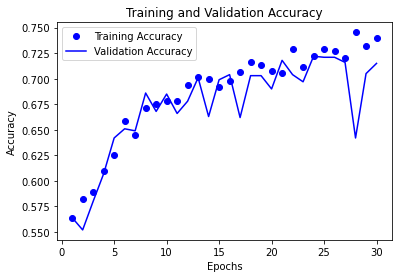

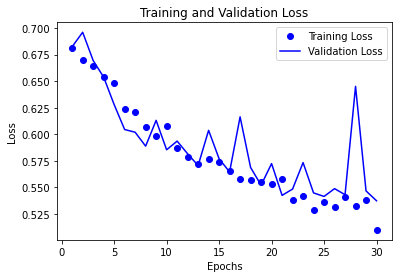

In [38]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()